In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5



# First attempt at convnet

## Pre-process images

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [240]:
# The path to the directory where the original
# dataset was uncompressed
original_normal_dir = r'.\data\OCT2017\train\NORMAL'
original_cnv_dir = r'.\data\OCT2017\train\CNV'
original_dme_dir = r'.\data\OCT2017\train\DME'
original_drus_dir = r'.\data\OCT2017\train\DRUSEN'

# The directory where we will
# store our smaller dataset
base_dir = r'.\data\OCT2017\train\eyes_small'
# os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Directory with our training NORMAL pictures
train_norm_dir = os.path.join(train_dir, 'NORMAL')
# os.mkdir(train_norm_dir)

# Directory with our training CNV pictures
train_cnv_dir = os.path.join(train_dir, 'CNV')
# os.mkdir(train_cnv_dir)

# Directory with our training DME pictures
train_dme_dir = os.path.join(train_dir, 'DME')
# os.mkdir(train_dme_dir)

# Directory with our training DRUSEN pictures
train_drus_dir = os.path.join(train_dir, 'DRUSEN')
# os.mkdir(train_drus_dir)

# Directory with our validation NORMAL pictures
validation_norm_dir = os.path.join(validation_dir, 'NORMAL')
# os.mkdir(validation_norm_dir)

# Directory with our validation CNV pictures
validation_cnv_dir = os.path.join(validation_dir, 'CNV')
# os.mkdir(validation_cnv_dir)

# Directory with our validation DME pictures
validation_dme_dir = os.path.join(validation_dir, 'DME')
# os.mkdir(validation_dme_dir)

# Directory with our validation DRUSEN pictures
validation_drus_dir = os.path.join(validation_dir, 'DRUSEN')
# os.mkdir(validation_drus_dir)

# Directory with our test NORMAL pictures
test_norm_dir = os.path.join(test_dir, 'NORMAL')
# os.mkdir(test_norm_dir)

# Directory with our test CNV pictures
test_cnv_dir = os.path.join(test_dir, 'CNV')
# os.mkdir(test_cnv_dir)

# Directory with our test DME pictures
test_dme_dir = os.path.join(test_dir, 'DME')
# os.mkdir(test_dme_dir)

# Directory with our test DRUSEN pictures
test_drus_dir = os.path.join(test_dir, 'DRUSEN')
# os.mkdir(test_drus_dir)

In [241]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

** **
## batch_size = 256

In [5]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 30000 images belonging to 4 classes.


In [6]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [7]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [8]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (256, 150, 150, 3)
labels batch shape: (256, 4)


## Building the network

`relu`, `sigmoid`

In [9]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [10]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [11]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [12]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 218s 2s/step - loss: 1.2059 - acc: 0.4506 - val_loss: 1.1089 - val_acc: 0.4909
Epoch 2/50
128/128 [==============================] - 84s 657ms/step - loss: 0.9887 - acc: 0.5892 - val_loss: 1.1695 - val_acc: 0.5452
Epoch 3/50
128/128 [==============================] - 84s 659ms/step - loss: 0.8566 - acc: 0.6570 - val_loss: 0.9420 - val_acc: 0.6402
Epoch 4/50
128/128 [==============================] - 83s 648ms/step - loss: 0.7683 - acc: 0.6985 - val_loss: 0.8726 - val_acc: 0.6394
Epoch 5/50
128/128 [==============================] - 81s 633ms/step - loss: 0.6977 - acc: 0.7301 - val_loss: 0.8390 - val_acc: 0.6835
Epoch 6/50
128/128 [==============================] - 84s 654ms/step - loss: 0.6463 - acc: 0.7531 - val_loss: 0.9303 - val_acc: 0.6509
Epoch 7/50
128/128 [==============================] - 82s 643ms/step - loss: 0.6002 - acc: 0.7744 - val_loss: 0.8526 - val_acc: 0.6561
Epoch 8/50
128/128 [==============================] - 82s

In [13]:
model1.save('./models/small_samples/256_relu_sig.h5')

In [14]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7975000143051147


`tanh` vs `sigmoid`

In [15]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [16]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [17]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [18]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 81s 633ms/step - loss: 1.1682 - acc: 0.4735 - val_loss: 1.0794 - val_acc: 0.5424
Epoch 2/50
128/128 [==============================] - 76s 596ms/step - loss: 0.8910 - acc: 0.6339 - val_loss: 1.0023 - val_acc: 0.6055
Epoch 3/50
128/128 [==============================] - 78s 608ms/step - loss: 0.7899 - acc: 0.6811 - val_loss: 0.9650 - val_acc: 0.6438
Epoch 4/50
128/128 [==============================] - 78s 612ms/step - loss: 0.7212 - acc: 0.7147 - val_loss: 0.8732 - val_acc: 0.6561
Epoch 5/50
128/128 [==============================] - 76s 596ms/step - loss: 0.6594 - acc: 0.7444 - val_loss: 0.8663 - val_acc: 0.6887
Epoch 6/50
128/128 [==============================] - 77s 603ms/step - loss: 0.6120 - acc: 0.7686 - val_loss: 0.9253 - val_acc: 0.6938
Epoch 7/50
128/128 [==============================] - 78s 612ms/step - loss: 0.5660 - acc: 0.7864 - val_loss: 0.7700 - val_acc: 0.6898
Epoch 8/50
128/128 [==============================] - 8

In [19]:
model2.save('./models/small_samples/256_tanh_sig.h5')

In [20]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7459999918937683


`tanh` vs `softmax`

In [21]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [22]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [23]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [24]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 81s 631ms/step - loss: 1.1918 - acc: 0.4662 - val_loss: 1.1042 - val_acc: 0.5320
Epoch 2/50
128/128 [==============================] - 77s 601ms/step - loss: 0.9102 - acc: 0.6347 - val_loss: 1.0555 - val_acc: 0.5822
Epoch 3/50
128/128 [==============================] - 77s 605ms/step - loss: 0.7983 - acc: 0.6888 - val_loss: 1.0825 - val_acc: 0.6387
Epoch 4/50
128/128 [==============================] - 78s 611ms/step - loss: 0.7118 - acc: 0.7274 - val_loss: 0.8581 - val_acc: 0.6716
Epoch 5/50
128/128 [==============================] - 76s 593ms/step - loss: 0.6632 - acc: 0.7513 - val_loss: 0.8886 - val_acc: 0.6818
Epoch 6/50
128/128 [==============================] - 77s 602ms/step - loss: 0.6005 - acc: 0.7794 - val_loss: 0.7761 - val_acc: 0.6917
Epoch 7/50
128/128 [==============================] - 77s 602ms/step - loss: 0.5640 - acc: 0.7929 - val_loss: 0.8110 - val_acc: 0.6787
Epoch 8/50
128/128 [==============================] - 7

In [25]:
model3.save('./models/small_samples/256_tanh_sfm.h5')

In [26]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7555000185966492


`relu` vs `softmax`

In [27]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [28]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [29]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [30]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 82s 639ms/step - loss: 1.2213 - acc: 0.4451 - val_loss: 1.1933 - val_acc: 0.4969
Epoch 2/50
128/128 [==============================] - 78s 612ms/step - loss: 0.9772 - acc: 0.5995 - val_loss: 0.9709 - val_acc: 0.5820
Epoch 3/50
128/128 [==============================] - 79s 614ms/step - loss: 0.8376 - acc: 0.6692 - val_loss: 0.9410 - val_acc: 0.6036
Epoch 4/50
128/128 [==============================] - 79s 620ms/step - loss: 0.7442 - acc: 0.7110 - val_loss: 0.7609 - val_acc: 0.6524
Epoch 5/50
128/128 [==============================] - 76s 598ms/step - loss: 0.6817 - acc: 0.7388 - val_loss: 0.8283 - val_acc: 0.6562
Epoch 6/50
128/128 [==============================] - 78s 610ms/step - loss: 0.6377 - acc: 0.7592 - val_loss: 0.9033 - val_acc: 0.6734
Epoch 7/50
128/128 [==============================] - 79s 619ms/step - loss: 0.5852 - acc: 0.7821 - val_loss: 0.9581 - val_acc: 0.6948
Epoch 8/50
128/128 [==============================] - 7

In [31]:
model4.save('./models/small_samples/256_relu_sfm.h5')

In [32]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.8065000176429749


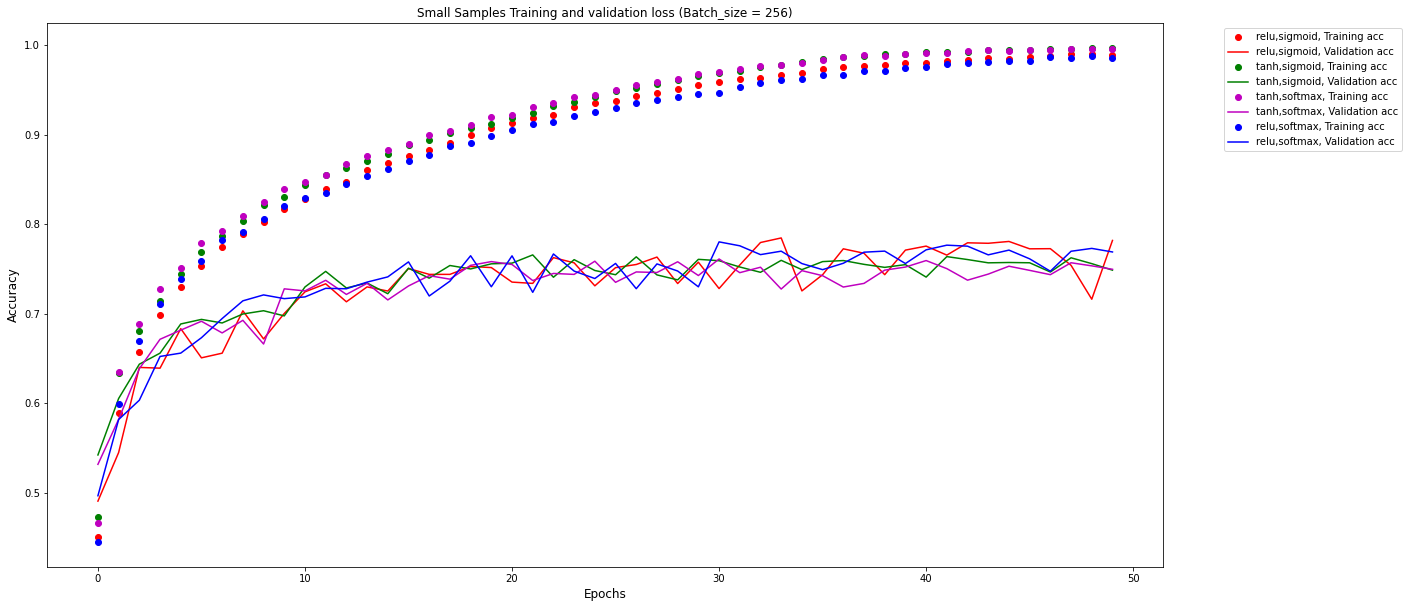

In [33]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Small Samples Training and validation loss (Batch_size = 256)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

** **
## batch_size = 128

In [34]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 30000 images belonging to 4 classes.


In [35]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [36]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [37]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 150, 150, 3)
labels batch shape: (128, 4)


## Building the network

`relu`, `sigmoid`

In [38]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [39]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [40]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [41]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 40s 316ms/step - loss: 1.2511 - acc: 0.4146 - val_loss: 1.2862 - val_acc: 0.4087
Epoch 2/50
128/128 [==============================] - 38s 298ms/step - loss: 1.0255 - acc: 0.5645 - val_loss: 0.9629 - val_acc: 0.5740
Epoch 3/50
128/128 [==============================] - 38s 298ms/step - loss: 0.8929 - acc: 0.6312 - val_loss: 0.8836 - val_acc: 0.5387
Epoch 4/50
128/128 [==============================] - 39s 303ms/step - loss: 0.8123 - acc: 0.6736 - val_loss: 0.9722 - val_acc: 0.6073
Epoch 5/50
128/128 [==============================] - 39s 305ms/step - loss: 0.7446 - acc: 0.7030 - val_loss: 0.9909 - val_acc: 0.5791
Epoch 6/50
128/128 [==============================] - 39s 308ms/step - loss: 0.7019 - acc: 0.7293 - val_loss: 1.1286 - val_acc: 0.6565
Epoch 7/50
128/128 [==============================] - 40s 310ms/step - loss: 0.6593 - acc: 0.7428 - val_loss: 0.9167 - val_acc: 0.6464
Epoch 8/50
128/128 [==============================] - 4

In [42]:
model1.save('./models/small_samples/128_relu_sig.h5')

In [43]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.8169999718666077


`tanh` vs `sigmoid`

In [44]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [45]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [46]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [47]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 40s 314ms/step - loss: 1.1907 - acc: 0.4592 - val_loss: 1.1217 - val_acc: 0.5153
Epoch 2/50
128/128 [==============================] - 38s 297ms/step - loss: 0.9470 - acc: 0.6044 - val_loss: 1.1274 - val_acc: 0.5895
Epoch 3/50
128/128 [==============================] - 38s 296ms/step - loss: 0.8385 - acc: 0.6568 - val_loss: 0.9488 - val_acc: 0.6213
Epoch 4/50
128/128 [==============================] - 38s 301ms/step - loss: 0.7722 - acc: 0.6890 - val_loss: 0.8682 - val_acc: 0.6221
Epoch 5/50
128/128 [==============================] - 39s 303ms/step - loss: 0.7349 - acc: 0.7090 - val_loss: 0.8400 - val_acc: 0.6367
Epoch 6/50
128/128 [==============================] - 39s 305ms/step - loss: 0.6716 - acc: 0.7410 - val_loss: 0.8211 - val_acc: 0.6698
Epoch 7/50
128/128 [==============================] - 39s 308ms/step - loss: 0.6412 - acc: 0.7557 - val_loss: 0.8314 - val_acc: 0.6678
Epoch 8/50
128/128 [==============================] - 4

In [48]:
model2.save('./models/small_samples/128_tanh_sig.h5')

In [49]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7695000171661377


`tanh` vs `softmax`

In [50]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [51]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [52]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [53]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 41s 319ms/step - loss: 1.2028 - acc: 0.4570 - val_loss: 1.1724 - val_acc: 0.5217
Epoch 2/50
128/128 [==============================] - 38s 301ms/step - loss: 0.9383 - acc: 0.6225 - val_loss: 1.0239 - val_acc: 0.5774
Epoch 3/50
128/128 [==============================] - 38s 300ms/step - loss: 0.8092 - acc: 0.6804 - val_loss: 0.9818 - val_acc: 0.6538
Epoch 4/50
128/128 [==============================] - 39s 303ms/step - loss: 0.7336 - acc: 0.7160 - val_loss: 0.8831 - val_acc: 0.6582
Epoch 5/50
128/128 [==============================] - 39s 306ms/step - loss: 0.6878 - acc: 0.7408 - val_loss: 0.7794 - val_acc: 0.6901
Epoch 6/50
128/128 [==============================] - 39s 307ms/step - loss: 0.6225 - acc: 0.7684 - val_loss: 0.9742 - val_acc: 0.6544
Epoch 7/50
128/128 [==============================] - 40s 311ms/step - loss: 0.5845 - acc: 0.7828 - val_loss: 0.7653 - val_acc: 0.6988
Epoch 8/50
128/128 [==============================] - 4

In [54]:
model3.save('./models/small_samples/128_tanh_sfm.h5')

In [55]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7494999766349792


`relu` vs `softmax`

In [56]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [57]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [58]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [59]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 40s 316ms/step - loss: 1.2301 - acc: 0.4365 - val_loss: 1.1259 - val_acc: 0.4997
Epoch 2/50
128/128 [==============================] - 38s 296ms/step - loss: 1.0000 - acc: 0.5898 - val_loss: 1.0739 - val_acc: 0.5390
Epoch 3/50
128/128 [==============================] - 38s 296ms/step - loss: 0.8570 - acc: 0.6576 - val_loss: 0.9925 - val_acc: 0.6253
Epoch 4/50
128/128 [==============================] - 39s 302ms/step - loss: 0.7719 - acc: 0.7015 - val_loss: 0.8472 - val_acc: 0.6744
Epoch 5/50
128/128 [==============================] - 39s 304ms/step - loss: 0.7120 - acc: 0.7225 - val_loss: 0.9158 - val_acc: 0.6749
Epoch 6/50
128/128 [==============================] - 39s 307ms/step - loss: 0.6466 - acc: 0.7604 - val_loss: 0.7969 - val_acc: 0.6966
Epoch 7/50
128/128 [==============================] - 40s 311ms/step - loss: 0.6142 - acc: 0.7694 - val_loss: 0.7167 - val_acc: 0.6853
Epoch 8/50
128/128 [==============================] - 4

In [60]:
model4.save('./models/small_samples/128_relu_sfm.h5')

In [61]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.8209999799728394


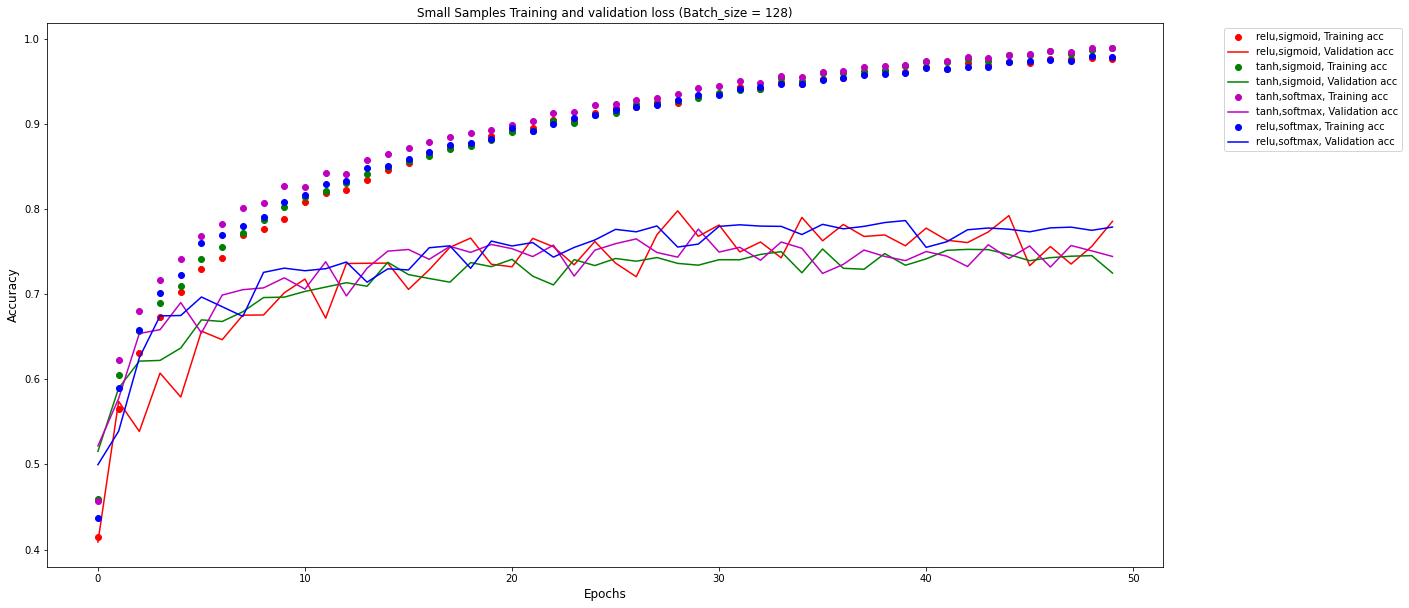

In [62]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Small Samples Training and validation loss (Batch_size = 128)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

** **
## batch_size = 64

In [242]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 30000 images belonging to 4 classes.


In [243]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [244]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [245]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 4)


## Building the network

`relu`, `sigmoid`

In [246]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [247]:
model1.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [248]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [249]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 67s 520ms/step - loss: 1.2774 - acc: 0.3929 - val_loss: 1.2300 - val_acc: 0.4940
Epoch 2/50
128/128 [==============================] - 53s 413ms/step - loss: 1.0733 - acc: 0.5438 - val_loss: 1.1566 - val_acc: 0.5438
Epoch 3/50
128/128 [==============================] - 55s 428ms/step - loss: 0.9551 - acc: 0.6036 - val_loss: 0.9615 - val_acc: 0.5917
Epoch 4/50
128/128 [==============================] - 43s 332ms/step - loss: 0.8474 - acc: 0.6668 - val_loss: 0.8546 - val_acc: 0.5764
Epoch 5/50
128/128 [==============================] - 22s 170ms/step - loss: 0.7813 - acc: 0.7024 - val_loss: 0.8078 - val_acc: 0.6488
Epoch 6/50
128/128 [==============================] - 22s 175ms/step - loss: 0.7447 - acc: 0.7142 - val_loss: 1.1333 - val_acc: 0.6720
Epoch 7/50
128/128 [==============================] - 22s 174ms/step - loss: 0.7222 - acc: 0.7185 - val_loss: 0.8393 - val_acc: 0.6926
Epoch 8/50
128/128 [==============================] - 2

In [250]:
model1.save('./models/small_samples/64_relu_sig.h5')

In [251]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.8209999799728394


`tanh` vs `sigmoid`

In [252]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [253]:
model2.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [254]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [255]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 23s 182ms/step - loss: 1.2129 - acc: 0.4351 - val_loss: 1.0737 - val_acc: 0.5044
Epoch 2/50
128/128 [==============================] - 22s 170ms/step - loss: 0.9769 - acc: 0.5812 - val_loss: 1.0366 - val_acc: 0.5593
Epoch 3/50
128/128 [==============================] - 22s 170ms/step - loss: 0.8920 - acc: 0.6292 - val_loss: 1.0733 - val_acc: 0.6183
Epoch 4/50
128/128 [==============================] - 22s 172ms/step - loss: 0.8157 - acc: 0.6699 - val_loss: 1.0420 - val_acc: 0.6269
Epoch 5/50
128/128 [==============================] - 22s 171ms/step - loss: 0.7844 - acc: 0.6847 - val_loss: 0.9082 - val_acc: 0.6310
Epoch 6/50
128/128 [==============================] - 22s 175ms/step - loss: 0.7260 - acc: 0.7118 - val_loss: 0.7882 - val_acc: 0.6331
Epoch 7/50
128/128 [==============================] - 22s 171ms/step - loss: 0.6984 - acc: 0.7274 - val_loss: 0.8342 - val_acc: 0.6878
Epoch 8/50
128/128 [==============================] - 2

In [262]:
model2.save('./models/small_samples/64_tanh_sig.h5')

In [263]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7950000166893005


`tanh` vs `softmax`

In [264]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [265]:
model3.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [266]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [267]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 23s 179ms/step - loss: 1.2298 - acc: 0.4412 - val_loss: 1.0510 - val_acc: 0.5190
Epoch 2/50
128/128 [==============================] - 21s 168ms/step - loss: 0.9785 - acc: 0.5989 - val_loss: 1.0315 - val_acc: 0.5561
Epoch 3/50
128/128 [==============================] - 22s 170ms/step - loss: 0.8611 - acc: 0.6589 - val_loss: 0.9724 - val_acc: 0.6053
Epoch 4/50
128/128 [==============================] - 22s 172ms/step - loss: 0.7788 - acc: 0.7022 - val_loss: 0.9481 - val_acc: 0.6150
Epoch 5/50
128/128 [==============================] - 22s 168ms/step - loss: 0.7358 - acc: 0.7240 - val_loss: 0.9689 - val_acc: 0.6666
Epoch 6/50
128/128 [==============================] - 22s 174ms/step - loss: 0.6999 - acc: 0.7327 - val_loss: 0.7613 - val_acc: 0.6534
Epoch 7/50
128/128 [==============================] - 22s 169ms/step - loss: 0.6513 - acc: 0.7546 - val_loss: 0.8214 - val_acc: 0.6945
Epoch 8/50
128/128 [==============================] - 2

In [268]:
model3.save('./models/small_samples/64_tanh_sfm.h5')

In [269]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7684999704360962


`relu` vs `softmax`

In [270]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [271]:
model4.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [272]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [273]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 26s 201ms/step - loss: 1.2782 - acc: 0.3980 - val_loss: 1.1900 - val_acc: 0.4889
Epoch 2/50
128/128 [==============================] - 23s 178ms/step - loss: 1.0825 - acc: 0.5344 - val_loss: 1.0782 - val_acc: 0.4968
Epoch 3/50
128/128 [==============================] - 23s 179ms/step - loss: 0.9632 - acc: 0.6041 - val_loss: 1.0339 - val_acc: 0.5891
Epoch 4/50
128/128 [==============================] - 23s 182ms/step - loss: 0.8502 - acc: 0.6566 - val_loss: 1.1098 - val_acc: 0.6082
Epoch 5/50
128/128 [==============================] - 23s 181ms/step - loss: 0.7821 - acc: 0.6865 - val_loss: 0.9870 - val_acc: 0.6383
Epoch 6/50
128/128 [==============================] - 24s 184ms/step - loss: 0.7390 - acc: 0.7089 - val_loss: 1.0694 - val_acc: 0.6556
Epoch 7/50
128/128 [==============================] - 23s 178ms/step - loss: 0.7031 - acc: 0.7274 - val_loss: 0.8449 - val_acc: 0.6412
Epoch 8/50
128/128 [==============================] - 2

In [274]:
model4.save('./models/small_samples/64_relu_sfm.h5')

In [275]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.8075000047683716


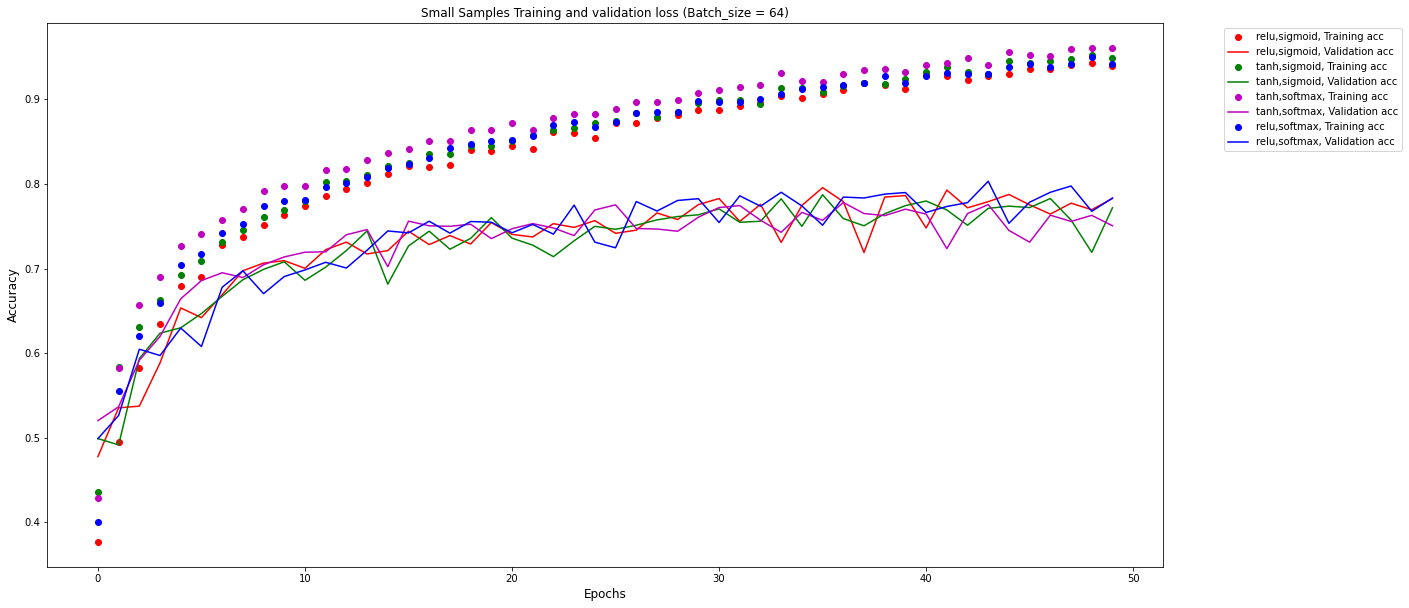

In [26]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Small Samples Training and validation loss (Batch_size = 64)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

** **
## batch_size = 32

In [64]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 30000 images belonging to 4 classes.


In [65]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [66]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [67]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 4)


## Building the network

`relu`, `sigmoid`

In [68]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [69]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [70]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [71]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 12s 90ms/step - loss: 1.3347 - acc: 0.3616 - val_loss: 1.3821 - val_acc: 0.3587
Epoch 2/50
128/128 [==============================] - 11s 86ms/step - loss: 1.1649 - acc: 0.4800 - val_loss: 1.1582 - val_acc: 0.5189
Epoch 3/50
128/128 [==============================] - 11s 85ms/step - loss: 1.0589 - acc: 0.5424 - val_loss: 1.3119 - val_acc: 0.4792
Epoch 4/50
128/128 [==============================] - 11s 85ms/step - loss: 0.9655 - acc: 0.5947 - val_loss: 1.2281 - val_acc: 0.5859
Epoch 5/50
128/128 [==============================] - 11s 85ms/step - loss: 0.8862 - acc: 0.6399 - val_loss: 0.8249 - val_acc: 0.6044
Epoch 6/50
128/128 [==============================] - 12s 90ms/step - loss: 0.8505 - acc: 0.6587 - val_loss: 1.0393 - val_acc: 0.6086
Epoch 7/50
128/128 [==============================] - 11s 86ms/step - loss: 0.7826 - acc: 0.6877 - val_loss: 1.1268 - val_acc: 0.6218
Epoch 8/50
128/128 [==============================] - 11s 87ms

In [72]:
model1.save('./models/small_samples/32_relu_sig.h5')

In [73]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.8644999861717224


`tanh` vs `sigmoid`

In [74]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [75]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [76]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [77]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 11s 89ms/step - loss: 1.2912 - acc: 0.3823 - val_loss: 1.2386 - val_acc: 0.4412
Epoch 2/50
128/128 [==============================] - 11s 83ms/step - loss: 1.0652 - acc: 0.5354 - val_loss: 1.1893 - val_acc: 0.5164
Epoch 3/50
128/128 [==============================] - 11s 82ms/step - loss: 0.9724 - acc: 0.5962 - val_loss: 1.0271 - val_acc: 0.5631
Epoch 4/50
128/128 [==============================] - 11s 83ms/step - loss: 0.9026 - acc: 0.6292 - val_loss: 1.1264 - val_acc: 0.5537
Epoch 5/50
128/128 [==============================] - 11s 82ms/step - loss: 0.8563 - acc: 0.6460 - val_loss: 1.1939 - val_acc: 0.6106
Epoch 6/50
128/128 [==============================] - 11s 87ms/step - loss: 0.8140 - acc: 0.6730 - val_loss: 1.0588 - val_acc: 0.6364
Epoch 7/50
128/128 [==============================] - 11s 83ms/step - loss: 0.7941 - acc: 0.6831 - val_loss: 1.0245 - val_acc: 0.6585
Epoch 8/50
128/128 [==============================] - 11s 83ms

In [79]:
model2.save('./models/small_samples/32_tanh_sig.h5')

In [78]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7804999947547913


`tanh` vs `softmax`

In [80]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [81]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [82]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [83]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 13s 100ms/step - loss: 1.2979 - acc: 0.3984 - val_loss: 1.0874 - val_acc: 0.5063
Epoch 2/50
128/128 [==============================] - 16s 124ms/step - loss: 1.0756 - acc: 0.5427 - val_loss: 1.2923 - val_acc: 0.5183
Epoch 3/50
128/128 [==============================] - 11s 87ms/step - loss: 0.9578 - acc: 0.6074 - val_loss: 1.0134 - val_acc: 0.5486
Epoch 4/50
128/128 [==============================] - 12s 91ms/step - loss: 0.8919 - acc: 0.6318 - val_loss: 0.9002 - val_acc: 0.5347
Epoch 5/50
128/128 [==============================] - 11s 87ms/step - loss: 0.8470 - acc: 0.6501 - val_loss: 1.0123 - val_acc: 0.6288
Epoch 6/50
128/128 [==============================] - 12s 91ms/step - loss: 0.7923 - acc: 0.6958 - val_loss: 0.8619 - val_acc: 0.6098
Epoch 7/50
128/128 [==============================] - 11s 89ms/step - loss: 0.7498 - acc: 0.7039 - val_loss: 0.9399 - val_acc: 0.6604
Epoch 8/50
128/128 [==============================] - 11s 88

In [84]:
model3.save('./models/small_samples/32_tanh_sfm.h5')

In [85]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.7749999761581421


`relu` vs `softmax`

In [86]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [87]:
model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [88]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [89]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 12s 93ms/step - loss: 1.3164 - acc: 0.3689 - val_loss: 1.1347 - val_acc: 0.3856
Epoch 2/50
128/128 [==============================] - 11s 86ms/step - loss: 1.1294 - acc: 0.5017 - val_loss: 1.2809 - val_acc: 0.5221
Epoch 3/50
128/128 [==============================] - 11s 86ms/step - loss: 1.0074 - acc: 0.5674 - val_loss: 1.0930 - val_acc: 0.5442
Epoch 4/50
128/128 [==============================] - 11s 88ms/step - loss: 0.9142 - acc: 0.6250 - val_loss: 0.8690 - val_acc: 0.5600
Epoch 5/50
128/128 [==============================] - 11s 85ms/step - loss: 0.8578 - acc: 0.6526 - val_loss: 0.8106 - val_acc: 0.6331
Epoch 6/50
128/128 [==============================] - 11s 88ms/step - loss: 0.7789 - acc: 0.6934 - val_loss: 0.9787 - val_acc: 0.6585
Epoch 7/50
128/128 [==============================] - 11s 85ms/step - loss: 0.7607 - acc: 0.7004 - val_loss: 1.0724 - val_acc: 0.6528
Epoch 8/50
128/128 [==============================] - 11s 87ms

In [90]:
model4.save('./models/small_samples/32_relu_sfm.h5')

In [91]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 4 classes.
test acc: 0.8569999933242798


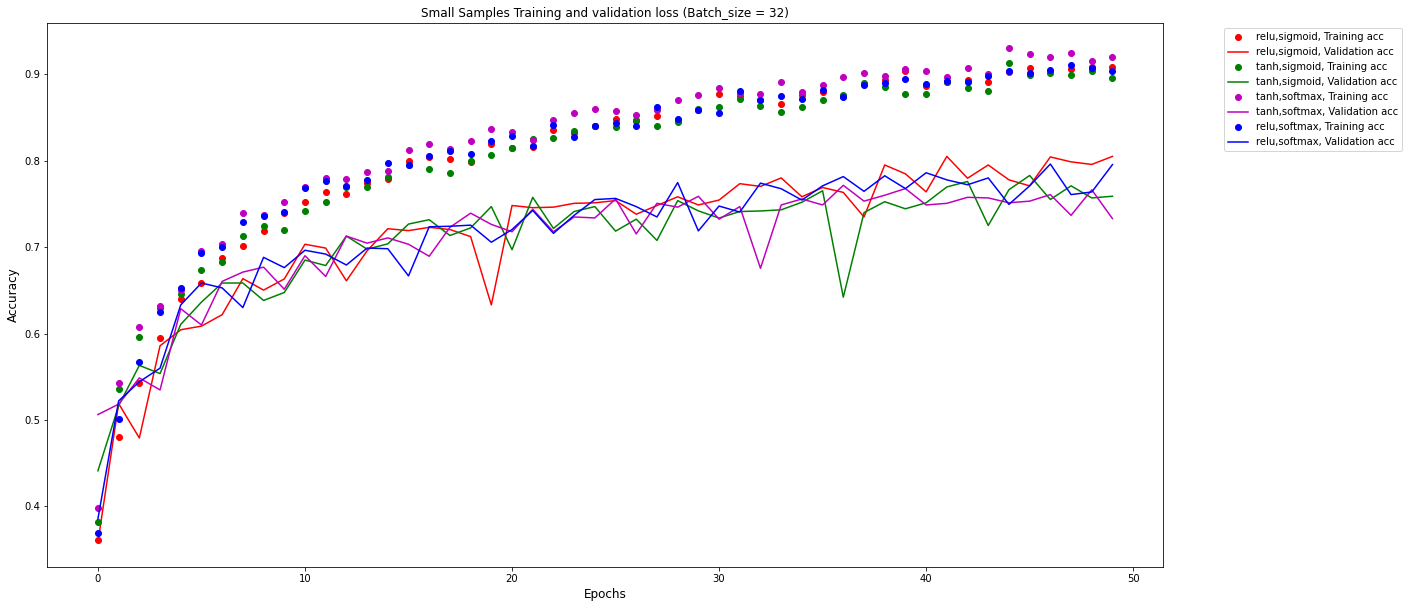

In [92]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Small Samples Training and validation loss (Batch_size = 32)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

** ** 
** **
# Extra 

## Stratified

In [63]:
# The path to the directory where the original
# dataset was uncompressed
original_normal_dir = r'.\data\OCT2017\train\NORMAL'
original_cnv_dir = r'.\data\OCT2017\train\CNV'
original_dme_dir = r'.\data\OCT2017\train\DME'
original_drus_dir = r'.\data\OCT2017\train\DRUSEN'

# The directory where we will
# store our smaller dataset
base_dir = r'.\data\OCT2017\stratified_data'
# os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Directory with our training NORMAL pictures
train_norm_dir = os.path.join(train_dir, 'NORMAL')
# os.mkdir(train_norm_dir)

# Directory with our training CNV pictures
train_cnv_dir = os.path.join(train_dir, 'CNV')
# os.mkdir(train_cnv_dir)

# Directory with our training DME pictures
train_dme_dir = os.path.join(train_dir, 'DME')
# os.mkdir(train_dme_dir)

# Directory with our training DRUSEN pictures
train_drus_dir = os.path.join(train_dir, 'DRUSEN')
# os.mkdir(train_drus_dir)

# Directory with our validation NORMAL pictures
validation_norm_dir = os.path.join(validation_dir, 'NORMAL')
# os.mkdir(validation_norm_dir)

# Directory with our validation CNV pictures
validation_cnv_dir = os.path.join(validation_dir, 'CNV')
# os.mkdir(validation_cnv_dir)

# Directory with our validation DME pictures
validation_dme_dir = os.path.join(validation_dir, 'DME')
# os.mkdir(validation_dme_dir)

# Directory with our validation DRUSEN pictures
validation_drus_dir = os.path.join(validation_dir, 'DRUSEN')
# os.mkdir(validation_drus_dir)

# Directory with our test NORMAL pictures
test_norm_dir = os.path.join(test_dir, 'NORMAL')
# os.mkdir(test_norm_dir)

# Directory with our test CNV pictures
test_cnv_dir = os.path.join(test_dir, 'CNV')
# os.mkdir(test_cnv_dir)

# Directory with our test DME pictures
test_dme_dir = os.path.join(test_dir, 'DME')
# os.mkdir(test_dme_dir)

# Directory with our test DRUSEN pictures
test_drus_dir = os.path.join(test_dir, 'DRUSEN')
# os.mkdir(test_drus_dir)

In [64]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

** **
### Batch = 32

In [65]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [66]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [67]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [68]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 4)


## Building the network

`relu`, `sigmoid`

In [69]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [70]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [71]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [72]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 35s 273ms/step - loss: 1.2074 - acc: 0.4846 - val_loss: 1.0301 - val_acc: 0.5894
Epoch 2/50
128/128 [==============================] - 32s 251ms/step - loss: 1.0322 - acc: 0.6160 - val_loss: 1.1074 - val_acc: 0.5569
Epoch 3/50
128/128 [==============================] - 29s 224ms/step - loss: 0.9118 - acc: 0.6589 - val_loss: 0.7188 - val_acc: 0.6875
Epoch 4/50
128/128 [==============================] - 27s 210ms/step - loss: 0.8048 - acc: 0.7039 - val_loss: 0.9837 - val_acc: 0.6650
Epoch 5/50
128/128 [==============================] - 26s 206ms/step - loss: 0.7606 - acc: 0.7170 - val_loss: 0.8330 - val_acc: 0.6919
Epoch 6/50
128/128 [==============================] - 27s 208ms/step - loss: 0.7124 - acc: 0.7368 - val_loss: 0.5425 - val_acc: 0.7431
Epoch 7/50
128/128 [==============================] - 26s 206ms/step - loss: 0.6656 - acc: 0.7571 - val_loss: 0.4812 - val_acc: 0.7556
Epoch 8/50
128/128 [==============================] - 2

In [74]:
model1.save('./models/Stratefied_samples/32_relu_sig.h5')

In [75]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.8784999847412109


`tanh` vs `sigmoid`

In [76]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [77]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [78]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [79]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 12s 95ms/step - loss: 1.1534 - acc: 0.5312 - val_loss: 1.0256 - val_acc: 0.6169
Epoch 2/50
128/128 [==============================] - 11s 89ms/step - loss: 0.9368 - acc: 0.6489 - val_loss: 1.0677 - val_acc: 0.6769
Epoch 3/50
128/128 [==============================] - 11s 89ms/step - loss: 0.8378 - acc: 0.6863 - val_loss: 0.7985 - val_acc: 0.7025
Epoch 4/50
128/128 [==============================] - 11s 89ms/step - loss: 0.7428 - acc: 0.7214 - val_loss: 0.4561 - val_acc: 0.7425
Epoch 5/50
128/128 [==============================] - 11s 88ms/step - loss: 0.7096 - acc: 0.7310 - val_loss: 0.7425 - val_acc: 0.7431
Epoch 6/50
128/128 [==============================] - 11s 87ms/step - loss: 0.6872 - acc: 0.7500 - val_loss: 0.8186 - val_acc: 0.7281
Epoch 7/50
128/128 [==============================] - 11s 87ms/step - loss: 0.6550 - acc: 0.7507 - val_loss: 0.8248 - val_acc: 0.7731
Epoch 8/50
128/128 [==============================] - 11s 87ms

In [80]:
model2.save('./models/Stratefied_samples/32_tanh_sig.h5')

In [81]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.8845000267028809


`tanh` vs `softmax`

In [82]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [83]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [84]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [85]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 12s 93ms/step - loss: 1.1138 - acc: 0.5605 - val_loss: 1.0002 - val_acc: 0.6669
Epoch 2/50
128/128 [==============================] - 11s 88ms/step - loss: 0.8920 - acc: 0.6614 - val_loss: 1.1009 - val_acc: 0.6881
Epoch 3/50
128/128 [==============================] - 11s 87ms/step - loss: 0.7665 - acc: 0.7141 - val_loss: 0.8915 - val_acc: 0.7294
Epoch 4/50
128/128 [==============================] - 11s 87ms/step - loss: 0.7441 - acc: 0.7292 - val_loss: 0.7009 - val_acc: 0.7406
Epoch 5/50
128/128 [==============================] - 11s 88ms/step - loss: 0.6859 - acc: 0.7363 - val_loss: 0.8628 - val_acc: 0.7456
Epoch 6/50
128/128 [==============================] - 11s 87ms/step - loss: 0.6731 - acc: 0.7556 - val_loss: 0.6066 - val_acc: 0.7694
Epoch 7/50
128/128 [==============================] - 11s 88ms/step - loss: 0.6134 - acc: 0.7708 - val_loss: 0.3161 - val_acc: 0.7906
Epoch 8/50
128/128 [==============================] - 11s 88ms

In [86]:
model3.save('./models/Stratefied_samples/32_tanh_sfm.h5')

In [87]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.8740000128746033


`relu` vs `softmax`

In [88]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [89]:
model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [90]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [91]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 12s 93ms/step - loss: 1.1456 - acc: 0.5432 - val_loss: 1.1253 - val_acc: 0.5663
Epoch 2/50
128/128 [==============================] - 11s 85ms/step - loss: 0.9443 - acc: 0.6487 - val_loss: 0.9821 - val_acc: 0.6875
Epoch 3/50
128/128 [==============================] - 11s 86ms/step - loss: 0.8922 - acc: 0.6479 - val_loss: 0.7599 - val_acc: 0.7212
Epoch 4/50
128/128 [==============================] - 11s 86ms/step - loss: 0.8302 - acc: 0.6848 - val_loss: 0.5662 - val_acc: 0.7194
Epoch 5/50
128/128 [==============================] - 11s 86ms/step - loss: 0.7296 - acc: 0.7273 - val_loss: 0.7035 - val_acc: 0.7444
Epoch 6/50
128/128 [==============================] - 11s 85ms/step - loss: 0.6739 - acc: 0.7515 - val_loss: 0.8421 - val_acc: 0.7344
Epoch 7/50
128/128 [==============================] - 11s 86ms/step - loss: 0.6309 - acc: 0.7681 - val_loss: 0.7983 - val_acc: 0.7444
Epoch 8/50
128/128 [==============================] - 11s 87ms

In [92]:
model4.save('./models/Stratefied_samples/32_relu_sfm.h5')

In [93]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.8945000171661377


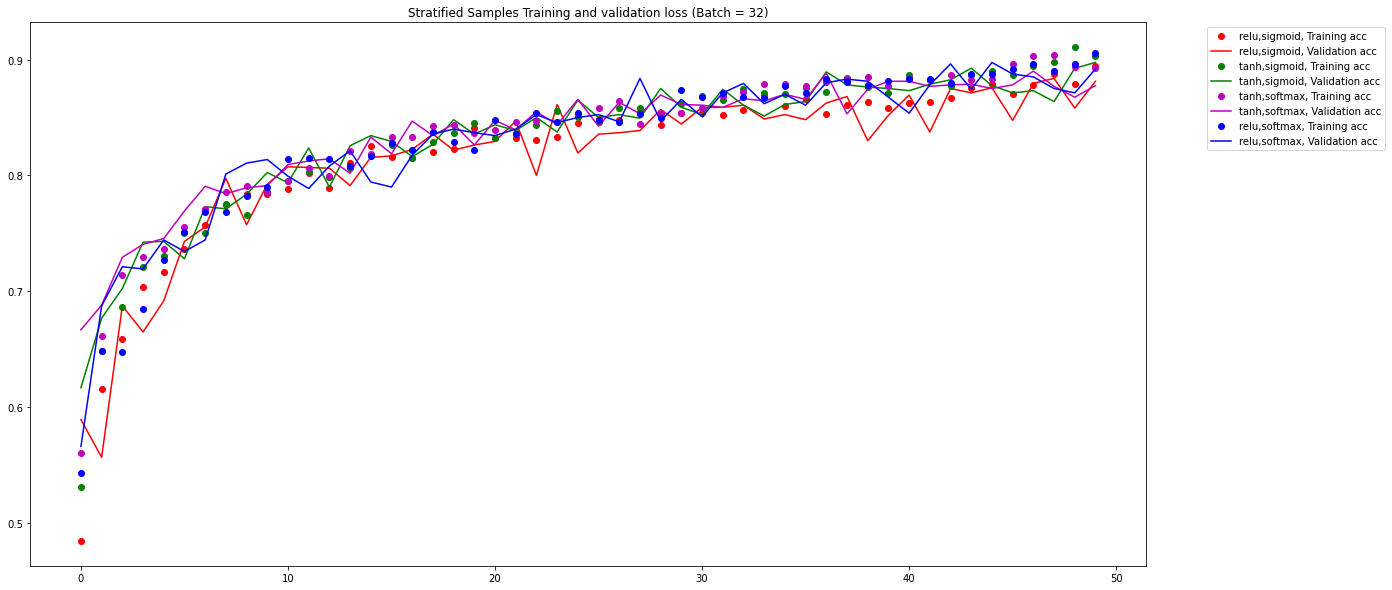

In [94]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Stratified Samples Training and validation loss (Batch = 32)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

** **
### Batch = 64

In [95]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [96]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [97]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [98]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 4)


## Building the network

`relu`, `sigmoid`

In [99]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [100]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [101]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [102]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 23s 177ms/step - loss: 1.1914 - acc: 0.5029 - val_loss: 1.0578 - val_acc: 0.6119
Epoch 2/50
128/128 [==============================] - 21s 162ms/step - loss: 0.9996 - acc: 0.6237 - val_loss: 0.8249 - val_acc: 0.6869
Epoch 3/50
128/128 [==============================] - 21s 166ms/step - loss: 0.8574 - acc: 0.6802 - val_loss: 0.8459 - val_acc: 0.6947
Epoch 4/50
128/128 [==============================] - 21s 166ms/step - loss: 0.7827 - acc: 0.7131 - val_loss: 0.7055 - val_acc: 0.7409
Epoch 5/50
128/128 [==============================] - 21s 163ms/step - loss: 0.7013 - acc: 0.7361 - val_loss: 0.4582 - val_acc: 0.7478
Epoch 6/50
128/128 [==============================] - 21s 165ms/step - loss: 0.6520 - acc: 0.7587 - val_loss: 0.8297 - val_acc: 0.7500
Epoch 7/50
128/128 [==============================] - 21s 166ms/step - loss: 0.6246 - acc: 0.7711 - val_loss: 0.6222 - val_acc: 0.7816
Epoch 8/50
128/128 [==============================] - 2

In [103]:
model1.save('./models/Stratefied_samples/64_relu_sig.h5')

In [104]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9110000133514404


`tanh` vs `sigmoid`

In [105]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [106]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [107]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [108]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 174ms/step - loss: 1.1201 - acc: 0.5415 - val_loss: 0.9244 - val_acc: 0.6438
Epoch 2/50
128/128 [==============================] - 21s 164ms/step - loss: 0.8832 - acc: 0.6686 - val_loss: 0.8726 - val_acc: 0.7094
Epoch 3/50
128/128 [==============================] - 21s 165ms/step - loss: 0.7875 - acc: 0.6982 - val_loss: 0.7025 - val_acc: 0.7109
Epoch 4/50
128/128 [==============================] - 21s 163ms/step - loss: 0.7182 - acc: 0.7283 - val_loss: 0.8258 - val_acc: 0.7434
Epoch 5/50
128/128 [==============================] - 21s 165ms/step - loss: 0.6758 - acc: 0.7473 - val_loss: 0.8366 - val_acc: 0.7284
Epoch 6/50
128/128 [==============================] - 21s 163ms/step - loss: 0.6554 - acc: 0.7582 - val_loss: 0.5880 - val_acc: 0.7419
Epoch 7/50
128/128 [==============================] - 21s 166ms/step - loss: 0.6113 - acc: 0.7747 - val_loss: 0.5009 - val_acc: 0.7856
Epoch 8/50
128/128 [==============================] - 2

In [109]:
model2.save('./models/Stratefied_samples/64_tanh_sig.h5')

In [110]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.8989999890327454


`tanh` vs `softmax`

In [111]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [112]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [113]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [114]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 175ms/step - loss: 1.0539 - acc: 0.5890 - val_loss: 0.9780 - val_acc: 0.6856
Epoch 2/50
128/128 [==============================] - 21s 165ms/step - loss: 0.8181 - acc: 0.6938 - val_loss: 0.7237 - val_acc: 0.7125
Epoch 3/50
128/128 [==============================] - 21s 165ms/step - loss: 0.7314 - acc: 0.7203 - val_loss: 0.6948 - val_acc: 0.7434
Epoch 4/50
128/128 [==============================] - 21s 165ms/step - loss: 0.6674 - acc: 0.7543 - val_loss: 0.5248 - val_acc: 0.7688
Epoch 5/50
128/128 [==============================] - 21s 165ms/step - loss: 0.6249 - acc: 0.7729 - val_loss: 0.6076 - val_acc: 0.7775
Epoch 6/50
128/128 [==============================] - 21s 165ms/step - loss: 0.5902 - acc: 0.7837 - val_loss: 0.5355 - val_acc: 0.7959
Epoch 7/50
128/128 [==============================] - 21s 168ms/step - loss: 0.5640 - acc: 0.7908 - val_loss: 0.6602 - val_acc: 0.8037
Epoch 8/50
128/128 [==============================] - 2

In [115]:
model3.save('./models/Stratefied_samples/64_tanh_sfm.h5')

In [116]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9014999866485596


`relu` vs `softmax`

In [117]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [118]:
model4.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [119]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [120]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 23s 178ms/step - loss: 1.1104 - acc: 0.5626 - val_loss: 1.1405 - val_acc: 0.5641
Epoch 2/50
128/128 [==============================] - 21s 165ms/step - loss: 0.9195 - acc: 0.6536 - val_loss: 0.7999 - val_acc: 0.6853
Epoch 3/50
128/128 [==============================] - 21s 166ms/step - loss: 0.8206 - acc: 0.6918 - val_loss: 1.1357 - val_acc: 0.6775
Epoch 4/50
128/128 [==============================] - 21s 165ms/step - loss: 0.7404 - acc: 0.7263 - val_loss: 0.6351 - val_acc: 0.7544
Epoch 5/50
128/128 [==============================] - 21s 165ms/step - loss: 0.6785 - acc: 0.7498 - val_loss: 0.7916 - val_acc: 0.7619
Epoch 6/50
128/128 [==============================] - 21s 167ms/step - loss: 0.6075 - acc: 0.7756 - val_loss: 0.5297 - val_acc: 0.7934
Epoch 7/50
128/128 [==============================] - 21s 167ms/step - loss: 0.5892 - acc: 0.7859 - val_loss: 0.4947 - val_acc: 0.8019
Epoch 8/50
128/128 [==============================] - 2

In [121]:
model4.save('./models/Stratefied_samples/64_relu_sfm.h5')

In [122]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9154999852180481


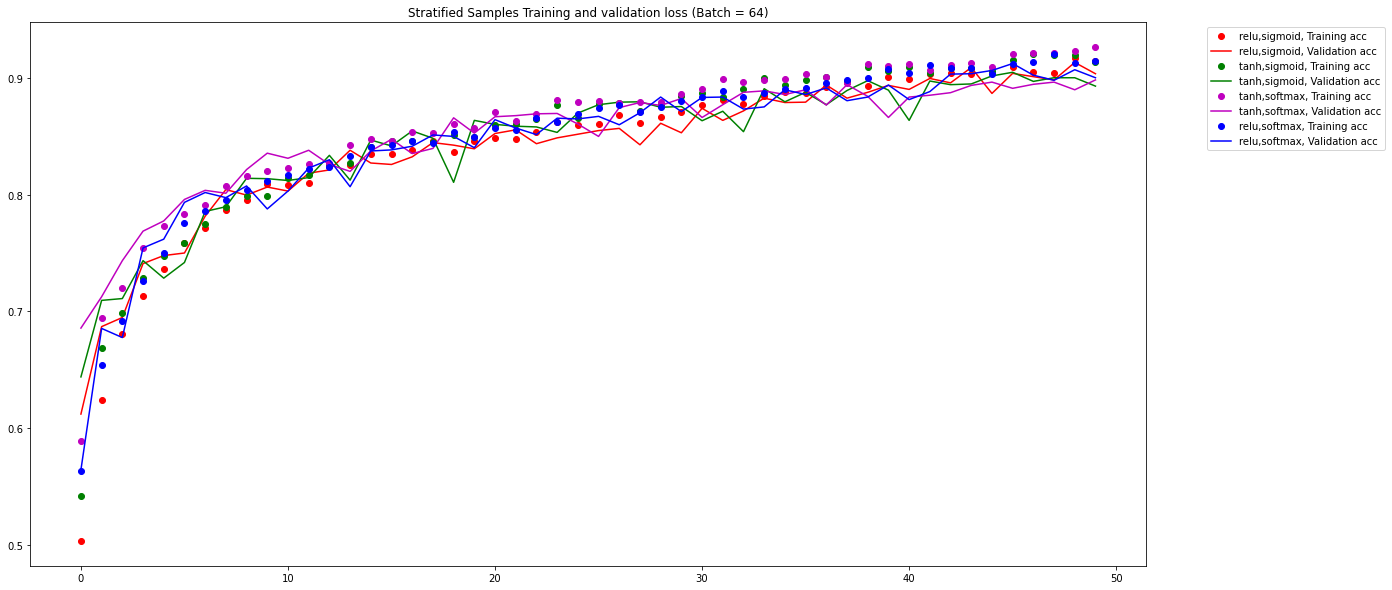

In [123]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Stratified Samples Training and validation loss (Batch = 64)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

** **
### Batch = 128

In [124]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [125]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [126]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [127]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 150, 150, 3)
labels batch shape: (128, 4)


## Building the network

`relu`, `sigmoid`

In [128]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [129]:
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [130]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [131]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 44s 344ms/step - loss: 1.1309 - acc: 0.5422 - val_loss: 0.8477 - val_acc: 0.6539
Epoch 2/50
128/128 [==============================] - 41s 321ms/step - loss: 0.9248 - acc: 0.6490 - val_loss: 0.9248 - val_acc: 0.7148
Epoch 3/50
128/128 [==============================] - 41s 321ms/step - loss: 0.8012 - acc: 0.7024 - val_loss: 0.7010 - val_acc: 0.7317
Epoch 4/50
128/128 [==============================] - 43s 335ms/step - loss: 0.7048 - acc: 0.7353 - val_loss: 0.7161 - val_acc: 0.7464
Epoch 5/50
128/128 [==============================] - 41s 323ms/step - loss: 0.6463 - acc: 0.7616 - val_loss: 0.6398 - val_acc: 0.7681
Epoch 6/50
128/128 [==============================] - 41s 320ms/step - loss: 0.5894 - acc: 0.7829 - val_loss: 0.6290 - val_acc: 0.7962
Epoch 7/50
128/128 [==============================] - 42s 325ms/step - loss: 0.5568 - acc: 0.7959 - val_loss: 0.4895 - val_acc: 0.7909
Epoch 8/50
128/128 [==============================] - 4

In [132]:
model1.save('./models/Stratefied_samples/128_relu_sig.h5')

In [133]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.8999999761581421


`tanh` vs `sigmoid`

In [134]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [135]:
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [136]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [137]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 44s 346ms/step - loss: 1.0765 - acc: 0.5704 - val_loss: 0.9830 - val_acc: 0.6852
Epoch 2/50
128/128 [==============================] - 41s 323ms/step - loss: 0.8213 - acc: 0.6900 - val_loss: 0.7702 - val_acc: 0.7136
Epoch 3/50
128/128 [==============================] - 41s 323ms/step - loss: 0.7293 - acc: 0.7257 - val_loss: 0.6239 - val_acc: 0.7405
Epoch 4/50
128/128 [==============================] - 42s 331ms/step - loss: 0.6670 - acc: 0.7515 - val_loss: 0.6387 - val_acc: 0.7555
Epoch 5/50
128/128 [==============================] - 41s 321ms/step - loss: 0.6192 - acc: 0.7711 - val_loss: 0.6131 - val_acc: 0.7752
Epoch 6/50
128/128 [==============================] - 41s 322ms/step - loss: 0.5833 - acc: 0.7854 - val_loss: 0.7524 - val_acc: 0.7798
Epoch 7/50
128/128 [==============================] - 41s 323ms/step - loss: 0.5332 - acc: 0.8061 - val_loss: 0.4818 - val_acc: 0.8142
Epoch 8/50
128/128 [==============================] - 4

In [138]:
model2.save('./models/Stratefied_samples/128_tanh_sig.h5')

In [139]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.871999979019165


`tanh` vs `softmax`

In [140]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [141]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [142]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [143]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 44s 346ms/step - loss: 1.0322 - acc: 0.5964 - val_loss: 0.7556 - val_acc: 0.6848
Epoch 2/50
128/128 [==============================] - 42s 329ms/step - loss: 0.7925 - acc: 0.7028 - val_loss: 0.6619 - val_acc: 0.7242
Epoch 3/50
128/128 [==============================] - 41s 323ms/step - loss: 0.7235 - acc: 0.7297 - val_loss: 0.5774 - val_acc: 0.7466
Epoch 4/50
128/128 [==============================] - 43s 335ms/step - loss: 0.6452 - acc: 0.7584 - val_loss: 0.6471 - val_acc: 0.7769
Epoch 5/50
128/128 [==============================] - 41s 321ms/step - loss: 0.5984 - acc: 0.7807 - val_loss: 0.4694 - val_acc: 0.7947
Epoch 6/50
128/128 [==============================] - 41s 322ms/step - loss: 0.5590 - acc: 0.7931 - val_loss: 0.4896 - val_acc: 0.8080
Epoch 7/50
128/128 [==============================] - 41s 324ms/step - loss: 0.5389 - acc: 0.8046 - val_loss: 0.5189 - val_acc: 0.8095
Epoch 8/50
128/128 [==============================] - 4

In [144]:
model3.save('./models/Stratefied_samples/128_tanh_sfm.h5')

In [145]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9024999737739563


`relu` vs `softmax`

In [146]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [147]:
model4.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [148]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [149]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 44s 345ms/step - loss: 1.0845 - acc: 0.5671 - val_loss: 1.0332 - val_acc: 0.5975
Epoch 2/50
128/128 [==============================] - 41s 323ms/step - loss: 0.8804 - acc: 0.6664 - val_loss: 0.8039 - val_acc: 0.6748
Epoch 3/50
128/128 [==============================] - 41s 321ms/step - loss: 0.7621 - acc: 0.7133 - val_loss: 0.7169 - val_acc: 0.7156
Epoch 4/50
128/128 [==============================] - 42s 331ms/step - loss: 0.6771 - acc: 0.7471 - val_loss: 0.7148 - val_acc: 0.7647
Epoch 5/50
128/128 [==============================] - 42s 326ms/step - loss: 0.6163 - acc: 0.7747 - val_loss: 0.7871 - val_acc: 0.7214
Epoch 6/50
128/128 [==============================] - 42s 324ms/step - loss: 0.5826 - acc: 0.7860 - val_loss: 0.5994 - val_acc: 0.8014
Epoch 7/50
128/128 [==============================] - 42s 326ms/step - loss: 0.5343 - acc: 0.8026 - val_loss: 0.5731 - val_acc: 0.7958
Epoch 8/50
128/128 [==============================] - 4

In [150]:
model4.save('./models/Stratefied_samples/128_relu_sfm.h5')

In [151]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9290000200271606


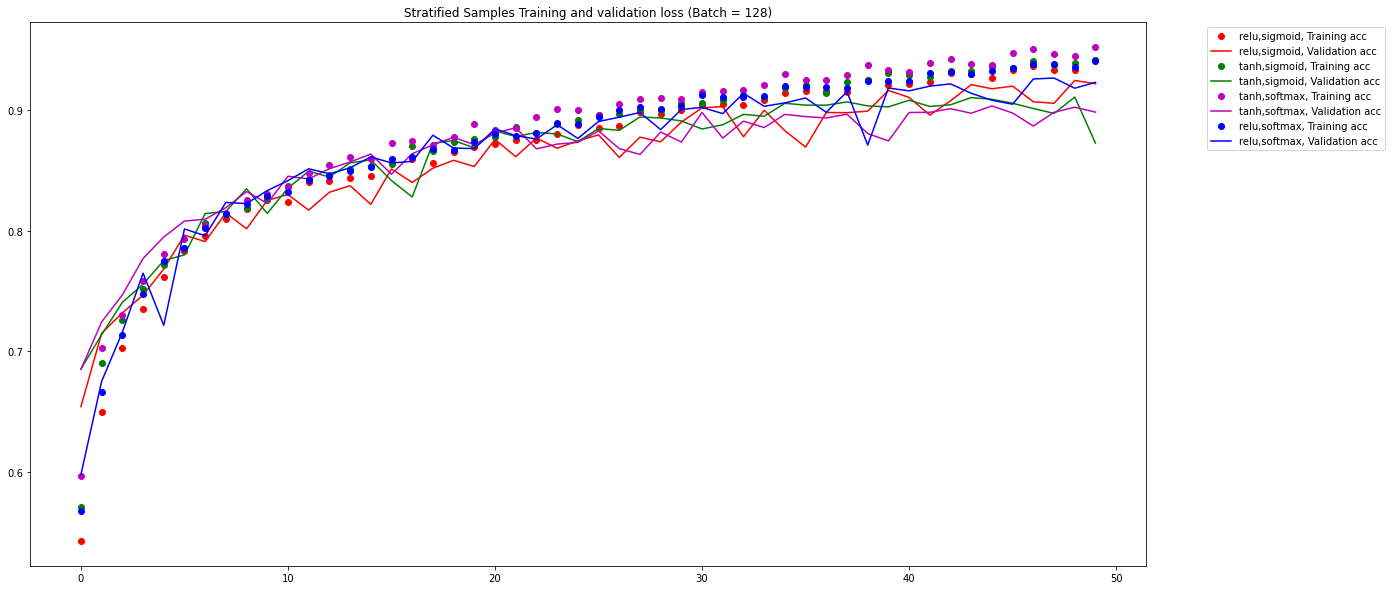

In [152]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Stratified Samples Training and validation loss (Batch = 128)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

** **
### Batch = 256

In [153]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 62208 images belonging to 4 classes.


In [154]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 3968 images belonging to 4 classes.


In [155]:
# test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')

In [156]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (256, 150, 150, 3)
labels batch shape: (256, 4)


## Building the network

`relu`, `sigmoid`

In [157]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [158]:
model1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [159]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [160]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 87s 680ms/step - loss: 1.1304 - acc: 0.5414 - val_loss: 0.9602 - val_acc: 0.6397
Epoch 2/50
128/128 [==============================] - 81s 636ms/step - loss: 0.9416 - acc: 0.6454 - val_loss: 0.8353 - val_acc: 0.6635
Epoch 3/50
128/128 [==============================] - 81s 636ms/step - loss: 0.8133 - acc: 0.6948 - val_loss: 0.6060 - val_acc: 0.7355
Epoch 4/50
128/128 [==============================] - 83s 645ms/step - loss: 0.7102 - acc: 0.7339 - val_loss: 0.7712 - val_acc: 0.7498
Epoch 5/50
128/128 [==============================] - 83s 648ms/step - loss: 0.6361 - acc: 0.7654 - val_loss: 0.7070 - val_acc: 0.7268
Epoch 6/50
128/128 [==============================] - 83s 649ms/step - loss: 0.5824 - acc: 0.7858 - val_loss: 0.5804 - val_acc: 0.8024
Epoch 7/50
128/128 [==============================] - 84s 657ms/step - loss: 0.5498 - acc: 0.8015 - val_loss: 0.5577 - val_acc: 0.8106
Epoch 8/50
128/128 [==============================] - 8

In [161]:
model1.save('./models/Stratefied_samples/256_relu_sig.h5')

In [162]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9135000109672546


`tanh` vs `sigmoid`

In [163]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [164]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [165]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [166]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 86s 674ms/step - loss: 1.0661 - acc: 0.5703 - val_loss: 0.8101 - val_acc: 0.6869
Epoch 2/50
128/128 [==============================] - 81s 630ms/step - loss: 0.7944 - acc: 0.7005 - val_loss: 0.9347 - val_acc: 0.6634
Epoch 3/50
128/128 [==============================] - 80s 628ms/step - loss: 0.7117 - acc: 0.7289 - val_loss: 0.6231 - val_acc: 0.7461
Epoch 4/50
128/128 [==============================] - 81s 636ms/step - loss: 0.6437 - acc: 0.7598 - val_loss: 0.5831 - val_acc: 0.7753
Epoch 5/50
128/128 [==============================] - 82s 640ms/step - loss: 0.6054 - acc: 0.7764 - val_loss: 0.6505 - val_acc: 0.7702
Epoch 6/50
128/128 [==============================] - 83s 647ms/step - loss: 0.5439 - acc: 0.8017 - val_loss: 0.5227 - val_acc: 0.8033
Epoch 7/50
128/128 [==============================] - 83s 647ms/step - loss: 0.5075 - acc: 0.8165 - val_loss: 0.5433 - val_acc: 0.8208
Epoch 8/50
128/128 [==============================] - 8

In [167]:
model2.save('./models/Stratefied_samples/256_tanh_sig.h5')

In [168]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9110000133514404


`tanh` vs `softmax`

In [169]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [170]:
model3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [171]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [172]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 85s 667ms/step - loss: 1.0213 - acc: 0.5934 - val_loss: 0.8292 - val_acc: 0.6880
Epoch 2/50
128/128 [==============================] - 81s 630ms/step - loss: 0.7607 - acc: 0.7142 - val_loss: 0.7804 - val_acc: 0.7119
Epoch 3/50
128/128 [==============================] - 81s 633ms/step - loss: 0.6626 - acc: 0.7523 - val_loss: 0.6034 - val_acc: 0.7627
Epoch 4/50
128/128 [==============================] - 81s 632ms/step - loss: 0.5892 - acc: 0.7826 - val_loss: 0.6471 - val_acc: 0.8006
Epoch 5/50
128/128 [==============================] - 82s 640ms/step - loss: 0.5446 - acc: 0.8008 - val_loss: 0.6172 - val_acc: 0.7705
Epoch 6/50
128/128 [==============================] - 82s 644ms/step - loss: 0.5098 - acc: 0.8132 - val_loss: 0.5747 - val_acc: 0.8239
Epoch 7/50
128/128 [==============================] - 83s 652ms/step - loss: 0.4846 - acc: 0.8263 - val_loss: 0.5048 - val_acc: 0.8268
Epoch 8/50
128/128 [==============================] - 8

In [173]:
model3.save('./models/Stratefied_samples/256_tanh_sfm.h5')

In [174]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.8880000114440918


`relu` vs `softmax`

In [175]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [176]:
model4.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [177]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [178]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 86s 669ms/step - loss: 1.0768 - acc: 0.5728 - val_loss: 1.0802 - val_acc: 0.5966
Epoch 2/50
128/128 [==============================] - 81s 632ms/step - loss: 0.8638 - acc: 0.6728 - val_loss: 0.8543 - val_acc: 0.6895
Epoch 3/50
128/128 [==============================] - 80s 627ms/step - loss: 0.7348 - acc: 0.7257 - val_loss: 0.5960 - val_acc: 0.7622
Epoch 4/50
128/128 [==============================] - 81s 632ms/step - loss: 0.6414 - acc: 0.7615 - val_loss: 0.6837 - val_acc: 0.7611
Epoch 5/50
128/128 [==============================] - 81s 636ms/step - loss: 0.5893 - acc: 0.7833 - val_loss: 0.5180 - val_acc: 0.7751
Epoch 6/50
128/128 [==============================] - 82s 643ms/step - loss: 0.5479 - acc: 0.7993 - val_loss: 0.5430 - val_acc: 0.8201
Epoch 7/50
128/128 [==============================] - 83s 649ms/step - loss: 0.5084 - acc: 0.8155 - val_loss: 0.5240 - val_acc: 0.8162
Epoch 8/50
128/128 [==============================] - 8

In [179]:
model4.save('./models/Stratefied_samples/256_relu_sfm.h5')

In [180]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 17308 images belonging to 4 classes.
test acc: 0.9330000281333923


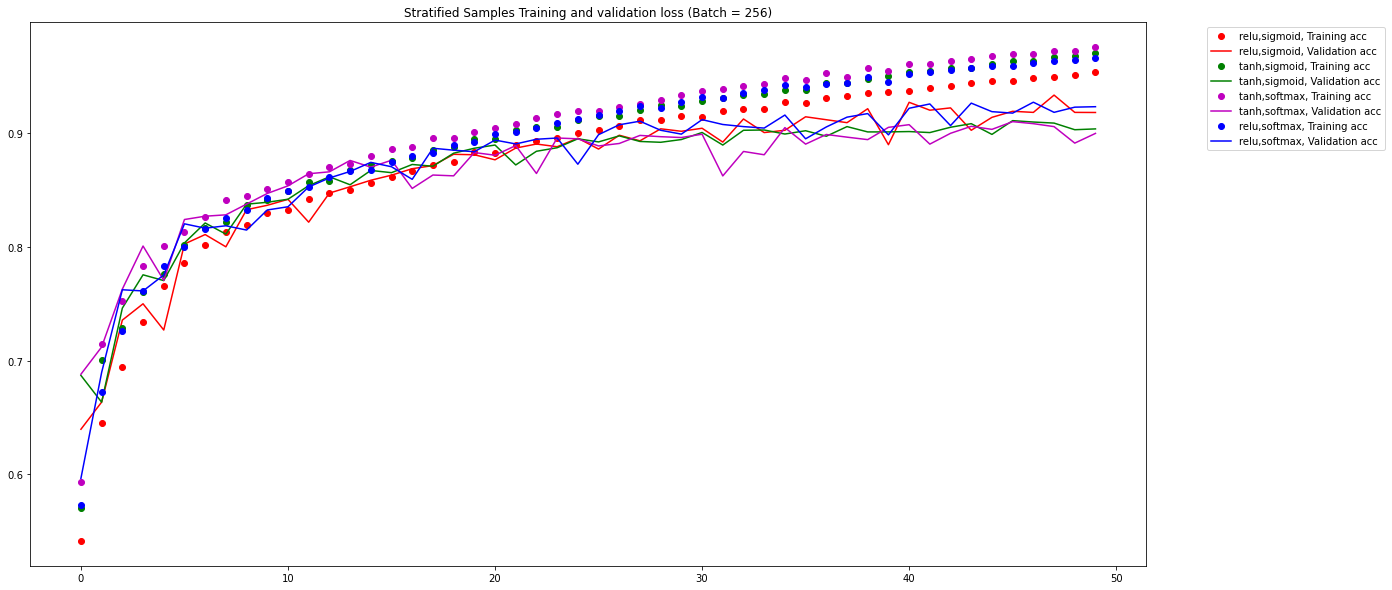

In [181]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Stratified Samples Training and validation loss (Batch = 256)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Random 


In [182]:
# The path to the directory where the original
# dataset was uncompressed
original_normal_dir = r'.\data\OCT2017\train\NORMAL'
original_cnv_dir = r'.\data\OCT2017\train\CNV'
original_dme_dir = r'.\data\OCT2017\train\DME'
original_drus_dir = r'.\data\OCT2017\train\DRUSEN'

# The directory where we will
# store our smaller dataset
base_dir = r'.\data\OCT2017\OCT2017'
# os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'val')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Directory with our training NORMAL pictures
train_norm_dir = os.path.join(train_dir, 'NORMAL')
# os.mkdir(train_norm_dir)

# Directory with our training CNV pictures
train_cnv_dir = os.path.join(train_dir, 'CNV')
# os.mkdir(train_cnv_dir)

# Directory with our training DME pictures
train_dme_dir = os.path.join(train_dir, 'DME')
# os.mkdir(train_dme_dir)

# Directory with our training DRUSEN pictures
train_drus_dir = os.path.join(train_dir, 'DRUSEN')
# os.mkdir(train_drus_dir)

# Directory with our validation NORMAL pictures
validation_norm_dir = os.path.join(validation_dir, 'NORMAL')
# os.mkdir(validation_norm_dir)

# Directory with our validation CNV pictures
validation_cnv_dir = os.path.join(validation_dir, 'CNV')
# os.mkdir(validation_cnv_dir)

# Directory with our validation DME pictures
validation_dme_dir = os.path.join(validation_dir, 'DME')
# os.mkdir(validation_dme_dir)

# Directory with our validation DRUSEN pictures
validation_drus_dir = os.path.join(validation_dir, 'DRUSEN')
# os.mkdir(validation_drus_dir)

# Directory with our test NORMAL pictures
test_norm_dir = os.path.join(test_dir, 'NORMAL')
# os.mkdir(test_norm_dir)

# Directory with our test CNV pictures
test_cnv_dir = os.path.join(test_dir, 'CNV')
# os.mkdir(test_cnv_dir)

# Directory with our test DME pictures
test_dme_dir = os.path.join(test_dir, 'DME')
# os.mkdir(test_dme_dir)

# Directory with our test DRUSEN pictures
test_drus_dir = os.path.join(test_dir, 'DRUSEN')
# os.mkdir(test_drus_dir)

In [183]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

** **

## Batch = 128

In [184]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 83484 images belonging to 4 classes.


In [185]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 32 images belonging to 4 classes.


In [186]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 150, 150, 3)
labels batch shape: (128, 4)


## Building the network

`relu`, `sigmoid`

In [187]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [188]:
model1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [189]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [190]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 108s 843ms/step - loss: 1.1436 - acc: 0.5315 - val_loss: 1.2900 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 103s 808ms/step - loss: 0.9431 - acc: 0.6395 - val_loss: 0.8950 - val_acc: 0.5625
Epoch 3/50
128/128 [==============================] - 102s 798ms/step - loss: 0.8244 - acc: 0.6893 - val_loss: 0.7577 - val_acc: 0.5938
Epoch 4/50
128/128 [==============================] - 100s 782ms/step - loss: 0.7127 - acc: 0.7353 - val_loss: 0.8278 - val_acc: 0.5312
Epoch 5/50
128/128 [==============================] - 100s 778ms/step - loss: 0.6460 - acc: 0.7598 - val_loss: 0.7393 - val_acc: 0.6875
Epoch 6/50
128/128 [==============================] - 40s 315ms/step - loss: 0.6007 - acc: 0.7789 - val_loss: 0.6073 - val_acc: 0.7500
Epoch 7/50
128/128 [==============================] - 35s 274ms/step - loss: 0.5519 - acc: 0.7973 - val_loss: 0.7662 - val_acc: 0.7188
Epoch 8/50
128/128 [==============================

In [191]:
model1.save('./models/random_samples/128_relu_sig.h5')

In [192]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.96074378490448


`tanh` vs `sigmoid`

In [193]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [194]:
model2.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [195]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [196]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 38s 295ms/step - loss: 1.0834 - acc: 0.5651 - val_loss: 0.9643 - val_acc: 0.5625
Epoch 2/50
128/128 [==============================] - 35s 274ms/step - loss: 0.8310 - acc: 0.6852 - val_loss: 0.9570 - val_acc: 0.5938
Epoch 3/50
128/128 [==============================] - 35s 274ms/step - loss: 0.7360 - acc: 0.7214 - val_loss: 0.7244 - val_acc: 0.6875
Epoch 4/50
128/128 [==============================] - 35s 273ms/step - loss: 0.6715 - acc: 0.7493 - val_loss: 0.7438 - val_acc: 0.6250
Epoch 5/50
128/128 [==============================] - 35s 274ms/step - loss: 0.6111 - acc: 0.7695 - val_loss: 0.7091 - val_acc: 0.6875
Epoch 6/50
128/128 [==============================] - 35s 273ms/step - loss: 0.5699 - acc: 0.7898 - val_loss: 0.7083 - val_acc: 0.7812
Epoch 7/50
128/128 [==============================] - 35s 272ms/step - loss: 0.5508 - acc: 0.7963 - val_loss: 0.6868 - val_acc: 0.7188
Epoch 8/50
128/128 [==============================] - 3

In [197]:
model2.save('./models/random_samples/128_tanh_sig.h5')

In [198]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.961776852607727


`tanh` vs `softmax`

In [199]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [200]:
model3.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [201]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [202]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 38s 298ms/step - loss: 1.0436 - acc: 0.5895 - val_loss: 1.0916 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 35s 277ms/step - loss: 0.7933 - acc: 0.7013 - val_loss: 0.9185 - val_acc: 0.5938
Epoch 3/50
128/128 [==============================] - 35s 273ms/step - loss: 0.7042 - acc: 0.7345 - val_loss: 0.8006 - val_acc: 0.7188
Epoch 4/50
128/128 [==============================] - 35s 277ms/step - loss: 0.6263 - acc: 0.7705 - val_loss: 0.5969 - val_acc: 0.8125
Epoch 5/50
128/128 [==============================] - 36s 277ms/step - loss: 0.5788 - acc: 0.7872 - val_loss: 0.5785 - val_acc: 0.7812
Epoch 6/50
128/128 [==============================] - 36s 278ms/step - loss: 0.5396 - acc: 0.8021 - val_loss: 0.8869 - val_acc: 0.6250
Epoch 7/50
128/128 [==============================] - 35s 277ms/step - loss: 0.5197 - acc: 0.8138 - val_loss: 0.6006 - val_acc: 0.7812
Epoch 8/50
128/128 [==============================] - 3

In [203]:
model3.save('./models/random_samples/128_tanh_sfm.h5')

In [204]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9390496015548706


`relu` vs `softmax`

In [205]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [206]:
model4.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [207]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [208]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 38s 296ms/step - loss: 1.0867 - acc: 0.5747 - val_loss: 1.0548 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 35s 276ms/step - loss: 0.8911 - acc: 0.6641 - val_loss: 0.9557 - val_acc: 0.5000
Epoch 3/50
128/128 [==============================] - 35s 275ms/step - loss: 0.7868 - acc: 0.7017 - val_loss: 0.7486 - val_acc: 0.6562
Epoch 4/50
128/128 [==============================] - 35s 274ms/step - loss: 0.6945 - acc: 0.7401 - val_loss: 0.7358 - val_acc: 0.6250
Epoch 5/50
128/128 [==============================] - 35s 275ms/step - loss: 0.6308 - acc: 0.7667 - val_loss: 0.5955 - val_acc: 0.6875
Epoch 6/50
128/128 [==============================] - 35s 276ms/step - loss: 0.5744 - acc: 0.7876 - val_loss: 0.6235 - val_acc: 0.8125
Epoch 7/50
128/128 [==============================] - 35s 277ms/step - loss: 0.5511 - acc: 0.7990 - val_loss: 0.5336 - val_acc: 0.8438
Epoch 8/50
128/128 [==============================] - 3

In [209]:
model4.save('./models/random_samples/128_relu_sfm.h5')

In [210]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9669421315193176


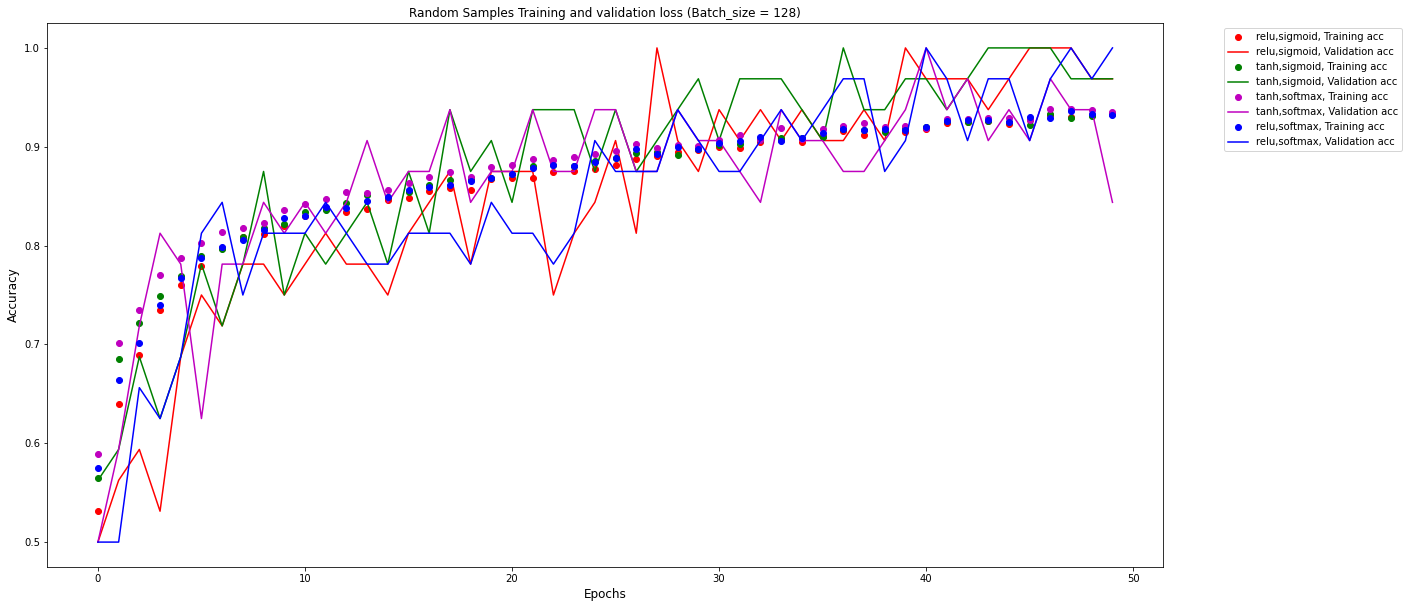

In [211]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Random Samples Training and validation loss (Batch_size = 128)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.show()

** **

## Batch = 256

In [212]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 83484 images belonging to 4 classes.


In [213]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=256, class_mode='categorical')

Found 32 images belonging to 4 classes.


In [214]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (256, 150, 150, 3)
labels batch shape: (256, 4)


## Building the network

`relu`, `sigmoid`

In [215]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [216]:
model1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [217]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [218]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 69s 542ms/step - loss: 1.1275 - acc: 0.5440 - val_loss: 1.2833 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 65s 504ms/step - loss: 0.9398 - acc: 0.6420 - val_loss: 0.9667 - val_acc: 0.5000
Epoch 3/50
128/128 [==============================] - 65s 504ms/step - loss: 0.8001 - acc: 0.6960 - val_loss: 0.7555 - val_acc: 0.5625
Epoch 4/50
128/128 [==============================] - 65s 506ms/step - loss: 0.7008 - acc: 0.7387 - val_loss: 0.6016 - val_acc: 0.7188
Epoch 5/50
128/128 [==============================] - 64s 501ms/step - loss: 0.6267 - acc: 0.7679 - val_loss: 0.5257 - val_acc: 0.7188
Epoch 6/50
128/128 [==============================] - 65s 507ms/step - loss: 0.5785 - acc: 0.7886 - val_loss: 0.7189 - val_acc: 0.6562
Epoch 7/50
128/128 [==============================] - 65s 510ms/step - loss: 0.5396 - acc: 0.8033 - val_loss: 0.5645 - val_acc: 0.8125
Epoch 8/50
128/128 [==============================] - 6

In [219]:
model1.save('./models/random_samples/256_relu_sig.h5')

In [220]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9690082669258118


`tanh` vs `sigmoid`

In [221]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [222]:
model2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [223]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [224]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 71s 557ms/step - loss: 1.0625 - acc: 0.5696 - val_loss: 1.1344 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 65s 508ms/step - loss: 0.8172 - acc: 0.6878 - val_loss: 0.7533 - val_acc: 0.6562
Epoch 3/50
128/128 [==============================] - 66s 514ms/step - loss: 0.7093 - acc: 0.7329 - val_loss: 0.7520 - val_acc: 0.6875
Epoch 4/50
128/128 [==============================] - 66s 512ms/step - loss: 0.6472 - acc: 0.7589 - val_loss: 0.5290 - val_acc: 0.8125
Epoch 5/50
128/128 [==============================] - 65s 507ms/step - loss: 0.5910 - acc: 0.7840 - val_loss: 0.6031 - val_acc: 0.7500
Epoch 6/50
128/128 [==============================] - 66s 513ms/step - loss: 0.5544 - acc: 0.7969 - val_loss: 0.4351 - val_acc: 0.8125
Epoch 7/50
128/128 [==============================] - 65s 506ms/step - loss: 0.5213 - acc: 0.8118 - val_loss: 0.4649 - val_acc: 0.8125
Epoch 8/50
128/128 [==============================] - 6

In [225]:
model2.save('./models/random_samples/256_tanh_sig.h5')

In [226]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9824380278587341


`tanh` vs `softmax`

In [227]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [228]:
model3.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [229]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [230]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 68s 535ms/step - loss: 1.0722 - acc: 0.5764 - val_loss: 1.1287 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 63s 495ms/step - loss: 0.8078 - acc: 0.6969 - val_loss: 0.9730 - val_acc: 0.5938
Epoch 3/50
128/128 [==============================] - 64s 502ms/step - loss: 0.6978 - acc: 0.7367 - val_loss: 0.7223 - val_acc: 0.6875
Epoch 4/50
128/128 [==============================] - 64s 500ms/step - loss: 0.6222 - acc: 0.7686 - val_loss: 0.8107 - val_acc: 0.7188
Epoch 5/50
128/128 [==============================] - 64s 497ms/step - loss: 0.5817 - acc: 0.7843 - val_loss: 0.7780 - val_acc: 0.7500
Epoch 6/50
128/128 [==============================] - 64s 499ms/step - loss: 0.5311 - acc: 0.8062 - val_loss: 0.6346 - val_acc: 0.8125
Epoch 7/50
128/128 [==============================] - 65s 505ms/step - loss: 0.5088 - acc: 0.8147 - val_loss: 0.6537 - val_acc: 0.8125
Epoch 8/50
128/128 [==============================] - 6

In [231]:
model3.save('./models/random_samples/256_tanh_sfm.h5')

In [232]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9772727489471436


`relu` vs `softmax`

In [233]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [234]:
model4.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 15, 15, 128)     

## Compilation

In [235]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [236]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 70s 547ms/step - loss: 1.0992 - acc: 0.5641 - val_loss: 1.1129 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 66s 514ms/step - loss: 0.8913 - acc: 0.6586 - val_loss: 0.9882 - val_acc: 0.5000
Epoch 3/50
128/128 [==============================] - 65s 509ms/step - loss: 0.7462 - acc: 0.7219 - val_loss: 0.7208 - val_acc: 0.6562
Epoch 4/50
128/128 [==============================] - 66s 515ms/step - loss: 0.6534 - acc: 0.7556 - val_loss: 0.7178 - val_acc: 0.6562
Epoch 5/50
128/128 [==============================] - 65s 507ms/step - loss: 0.5903 - acc: 0.7817 - val_loss: 0.6572 - val_acc: 0.7188
Epoch 6/50
128/128 [==============================] - 65s 510ms/step - loss: 0.5390 - acc: 0.8041 - val_loss: 0.5117 - val_acc: 0.8125
Epoch 7/50
128/128 [==============================] - 66s 514ms/step - loss: 0.5153 - acc: 0.8124 - val_loss: 0.5586 - val_acc: 0.7812
Epoch 8/50
128/128 [==============================] - 6

In [237]:
model4.save('./models/random_samples/256_relu_sfm.h5')

In [238]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9741735458374023


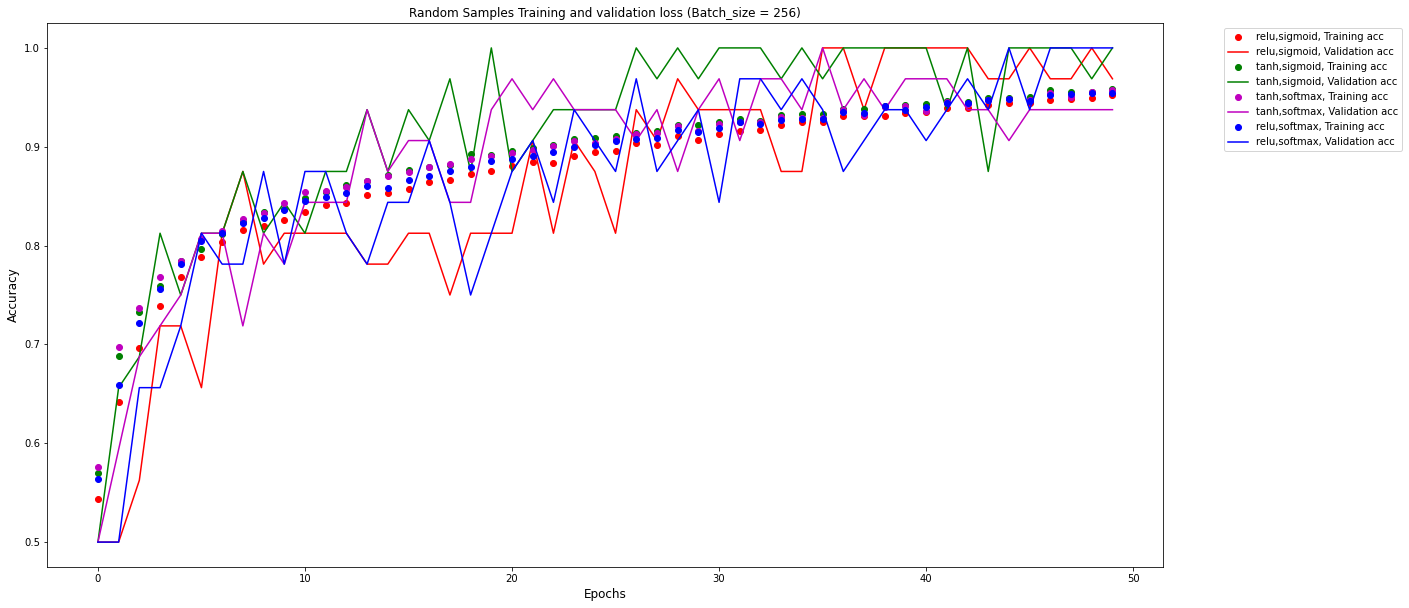

In [239]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Random Samples Training and validation loss (Batch_size = 256)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.show()